In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [38]:
model = Sequential()

# hidden layer
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(3, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172 (688.00 B)

 Trainable params: 172 (688.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.8687 - loss: 0.3223
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8733 - loss: 0.3113
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8628 - loss: 0.3388
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8662 - loss: 0.3244
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.8696 - loss: 0.3199
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.8718 - loss: 0.3226
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.8625 - loss: 0.3280
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8727 - loss: 0.3121
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.8673 - loss: 0.3231
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8741 - loss: 0.3092
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8666 - loss: 0.3195
Epoch 12/100
250/25

## Access the Weights and Bias of a particular model

In [48]:
model.layers[0].get_weights()

[array([[ 1.43830758e-02,  2.00435832e-01,  5.38706705e-02,
         -8.11550394e-03, -1.48990765e-01, -8.30550194e-02,
          1.91483051e-01, -1.16654143e-01, -8.67576823e-02,
          9.61307585e-02, -1.41380221e-01],
        [ 5.87603331e-01,  4.89951313e-01, -1.18233573e+00,
         -3.71133015e-02,  1.61732841e+00, -6.88221276e-01,
         -1.06188333e+00,  7.78864622e-01, -6.24761656e-02,
         -4.31142151e-01,  9.78593647e-01],
        [ 3.09637636e-01, -1.49930596e-01,  3.14095885e-01,
         -2.79586017e-02, -4.87345681e-02, -1.37557521e-01,
         -2.19177529e-01,  2.66473703e-02,  1.71892315e-01,
         -1.65319920e-01,  6.25572130e-02],
        [-7.82105207e-01, -3.12663436e-01, -1.58233792e-01,
          2.36151290e+00, -1.90307736e-01, -1.75949916e-01,
         -2.69964427e-01, -6.07059062e-01,  8.45227003e-01,
          1.28342664e+00,  1.15061246e-01],
        [-5.05161107e-01,  1.04153061e+00,  5.42796075e-01,
         -4.36773933e-02, -2.27736652e-01, -

In [49]:
model.layers[1].get_weights()

[array([[ 0.3245126 ,  0.7457418 , -0.04801425],
        [-0.40987447,  0.22745526, -0.9014321 ],
        [ 0.12784797,  0.61259735,  1.0545975 ],
        [-1.058116  ,  0.84481514,  0.93259835],
        [ 0.19862162, -0.560213  ,  0.4069455 ],
        [ 0.51953757,  0.83029056,  0.02013846],
        [ 0.43290278,  0.71174055, -0.03762791],
        [ 0.19551052,  0.7311742 ,  0.13789292],
        [-8.02634   , -1.2654002 , -4.368876  ],
        [ 0.03173919, -0.74999183, -0.04139627],
        [-2.8122923 ,  0.34738111, -1.7634479 ]], dtype=float32),
 array([ 0.05404086,  0.82750547, -0.24689172], dtype=float32)]

In [50]:
model.save("model.keras")

## Predictions

In [51]:
y_pred_raw = model.predict(X_test_scaled)
y_pred = np.where(y_pred_raw > 0.5, 1, 0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], shape=(2000, 1))

## Accuracy

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.872

## Plot curves during training

In [53]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8693 - loss: 0.3196 - val_accuracy: 0.8687 - val_loss: 0.3118
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.8692 - loss: 0.3187 - val_accuracy: 0.8694 - val_loss: 0.3120
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8697 - loss: 0.3135 - val_accuracy: 0.8631 - val_loss: 0.3155
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8726 - loss: 0.3135 - val_accuracy: 0.8712 - val_loss: 0.3143
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8679 - loss: 0.3183 - val_accuracy: 0.8669 - val_loss: 0.3154
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8690 - loss: 0.3208 - val_accuracy: 0.8700 - val_loss: 0.3145
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8665 - loss: 0.3265 - val_accuracy: 0.8675 - val_loss: 0.3166
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8632 - loss: 0

In [57]:
history.history

{'accuracy': [0.8650000095367432,
  0.8659374713897705,
  0.8675000071525574,
  0.8667187690734863,
  0.8660937547683716,
  0.866406261920929,
  0.8684375286102295,
  0.8671875,
  0.8662499785423279,
  0.8667187690734863,
  0.8673437237739563,
  0.8676562309265137,
  0.8675000071525574,
  0.8668749928474426,
  0.8678125143051147,
  0.8650000095367432,
  0.8648437261581421,
  0.866406261920929,
  0.8673437237739563,
  0.8665624856948853,
  0.8660937547683716,
  0.8657812476158142,
  0.8642187714576721,
  0.8662499785423279,
  0.8668749928474426,
  0.8660937547683716,
  0.8665624856948853,
  0.8668749928474426,
  0.8662499785423279,
  0.8668749928474426,
  0.8660937547683716,
  0.8656250238418579,
  0.8660937547683716,
  0.8665624856948853,
  0.8668749928474426,
  0.8646875023841858,
  0.8668749928474426,
  0.8651562333106995,
  0.8651562333106995,
  0.8651562333106995,
  0.8673437237739563,
  0.8650000095367432,
  0.8668749928474426,
  0.866406261920929,
  0.866406261920929,
  0.8653125

/var/folders/37/5qq129rj05b7nhh26ymwc0_w0000gn/T/ipykernel_97224/2371167057.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


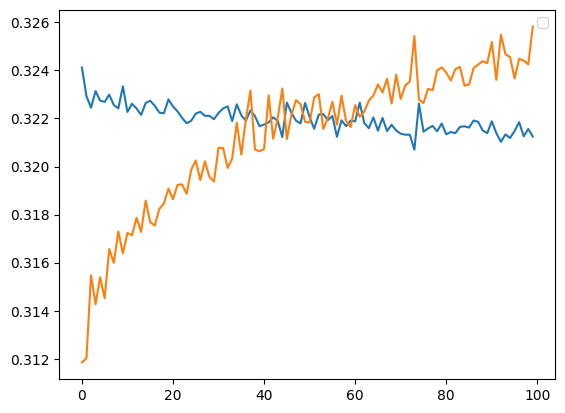

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()